---
* **Titulo**: Creación Matriz y Tablas de Correspondecias relaciones de los personajes del Universo Marvel
* **Autor:** Miguel Ponce
* **Correo:** miguelalejoponce@uoc.edu
* **Correo:** miguelalejoponce@uoc.edu
* **Fecha:** "Noviembre, 16 de 2021"
* **Salida**: ipynb, predicciones.csv
---
## Contexto: Preprocesamiento Datos

* **Contexto**: Reto a desarrollar
El Acuerdo de París es un tratado internacional sobre el cambio climático que fue adoptado por 196 Partes en la COP21 de París. Su objetivo es limitar el calentamiento mundial muy por debajo de 2, preferiblemente a 1,5 grados centígrados, en comparación con los niveles preindustriales.

Para alcanzar este objetivo de temperatura a largo plazo, los países se proponen alcanzar el máximo de las emisiones de gases de efecto invernadero lo antes posible para lograr un planeta con clima neutro para mediados de siglo.

Es por ello que la Unión Europea esta destinando grandes cantidades de recursos al desarrollo de nuevas tecnologías que permitan la mejorar la lucha contra la contaminación. Una de estas es un nuevo tipo de sensor basado en tecnología láser que permita detectar la calidad del aire en función de diferentes mediciones.
* **Problema :** ¿Como crear modelos de prediccion?
* **Solucion :** Utilizando herramienta de visualizacion y tecnica librería de tuning para crear modelos predictivos resolver el problema propuesto.
* **Entorno:** No es necesario el uso de GPU.
  

## Origen del la fuente de datos


* Features: El dataset contiene 8 features en 8 columnas que son los parámetros medidos por los diferentes sensores. Estos corresponden a las diferentes interacciones que han tenido los haces de los láseres al travesar las partículas del aire.

Target: El target corresponde al 'label' que clasifica la calidad del aire.

Target 0 corresponde a una calidad del aire Buena
Target 1 corresponde a una calidad del aire Moderada
Target 2 corresponde a una calidad del aire Peligrosa

URL Fuentes:
+ [https://nuwe.io/challenge/uoc-or-clasificacion-de-la-calidad-del-aire](https://nuwe.io/challenge/uoc-or-clasificacion-de-la-calidad-del-aire)


### Librerías Adicionales

In [18]:
!pip install pycaret

     |████████████████████████████████| 266 kB 5.3 MB/s 
     |████████████████████████████████| 6.8 MB 57.2 MB/s 
     |████████████████████████████████| 1.3 MB 58.4 MB/s 
     |████████████████████████████████| 56 kB 4.3 MB/s 
     |████████████████████████████████| 1.7 MB 74.7 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 2.0 MB 52.2 MB/s 
     |████████████████████████████████| 261 kB 49.5 MB/s 
     |████████████████████████████████| 113 kB 72.1 MB/s 
     |████████████████████████████████| 86 kB 5.4 MB/s 
     |████████████████████████████████| 167 kB 69.4 MB/s 
     |████████████████████████████████| 16.9 MB 43 kB/s 
     |████████████████████████████████| 10.1 MB 16.7 MB/s 
     |████████████████████████████████| 303 kB 58.9 MB/s 
     |████████████████████████████████| 675 kB 56.8 MB/s 
     |██████████████████

# Importar Liberías

In [55]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from pycaret.classification import *
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import numpy as np
import itertools
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold

### Importar las fuentes de datos

In [2]:
!wget https://challenges-asset-files.s3.us-east-2.amazonaws.com/data_sets/Data-Science/4+-+events/uoc/dataset/uoc_train.csv -O uoc_train.csv
!wget https://challenges-asset-files.s3.us-east-2.amazonaws.com/data_sets/Data-Science/4+-+events/uoc/dataset/uoc_X_test.csv -O uoc_X_test.csv

--2021-11-16 13:07:54--  https://challenges-asset-files.s3.us-east-2.amazonaws.com/data_sets/Data-Science/4+-+events/uoc/dataset/uoc_train.csv
Resolving challenges-asset-files.s3.us-east-2.amazonaws.com (challenges-asset-files.s3.us-east-2.amazonaws.com)... 52.219.96.216
Connecting to challenges-asset-files.s3.us-east-2.amazonaws.com (challenges-asset-files.s3.us-east-2.amazonaws.com)|52.219.96.216|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 334141 (326K) [text/csv]
Saving to: ‘uoc_train.csv’

uoc_train.csv       100%[===================>] 326.31K  --.-KB/s    in 0.08s   

2021-11-16 13:07:54 (3.87 MB/s) - ‘uoc_train.csv’ saved [334141/334141]

--2021-11-16 13:07:54--  https://challenges-asset-files.s3.us-east-2.amazonaws.com/data_sets/Data-Science/4+-+events/uoc/dataset/uoc_X_test.csv
Resolving challenges-asset-files.s3.us-east-2.amazonaws.com (challenges-asset-files.s3.us-east-2.amazonaws.com)... 52.219.96.216
Connecting to challenges-asset-files.s3.us-e

In [66]:
df_Base = pd.read_csv("uoc_train.csv")
df_Test = pd.read_csv("uoc_X_test.csv")
df_Base.head()

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,target
0,-0.458258,-0.579012,2.886009,-0.075516,1.674060,-2.431912,0.534850,-0.846473,2
1,1.626615,-0.028332,-1.443184,-1.007447,-0.989093,1.202627,-0.038211,-1.298616,0
2,1.721356,-0.137676,-1.322593,-1.333187,-0.723713,0.843285,-0.588495,0.066682,0
3,-0.715103,3.265915,-0.791030,-2.967881,2.497628,-0.277387,-0.551611,0.668354,2
4,2.944098,0.197871,-2.257025,1.032789,-4.104693,4.716115,-0.380813,-1.393825,0


Se verifica si los datos de la variable a predecir estan balanceados

In [4]:
df_Base.target.value_counts()

0    713
1    705
2    682
Name: target, dtype: int64

Se verifica si exiten valores atipicos en los datos.

In [5]:
df_Base.describe()

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,target
count,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000
mean,-0.318846,0.005348,-0.327567,0.024042,0.085851,-0.065000,-0.025603,-0.004437,0.985238
std,1.575061,1.605428,1.479745,1.548154,1.788543,2.124337,1.015619,1.003342,0.815098
min,-5.031501,-6.004578,-5.470794,-5.296172,-5.719499,-4.910575,-3.850552,-3.541608,0.000000
25%,-1.406249,-1.119150,-1.368208,-1.083716,-1.136441,-1.613267,-0.701442,-0.659096,0.000000
50%,-0.431219,-0.162577,-0.532158,0.152545,0.102788,-0.431328,-0.007598,-0.019797,1.000000
75%,0.773896,1.127450,0.573801,1.173172,1.507492,1.162813,0.665932,0.667530,2.000000
max,5.388387,7.663112,4.869581,4.318758,6.033273,7.053420,4.400697,3.579874,2.000000


Se verifica la distribucion.

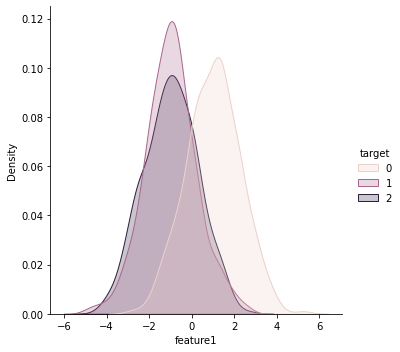

In [6]:
sns.displot(df_Base, x="feature1", hue="target", kind="kde", fill=True)

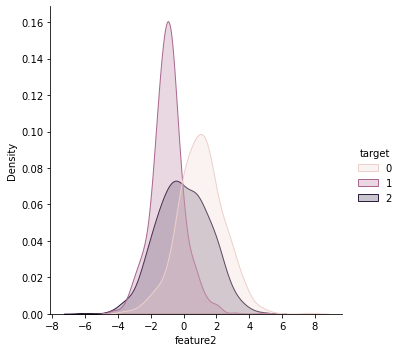

In [7]:
sns.displot(df_Base, x="feature2", hue="target", kind="kde", fill=True)

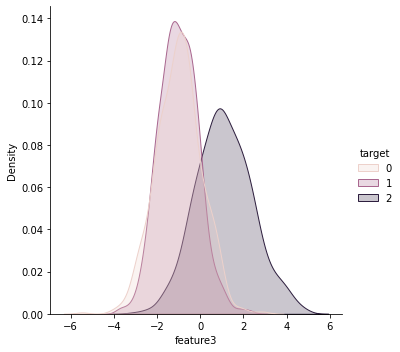

In [8]:
sns.displot(df_Base, x="feature3", hue="target", kind="kde", fill=True)

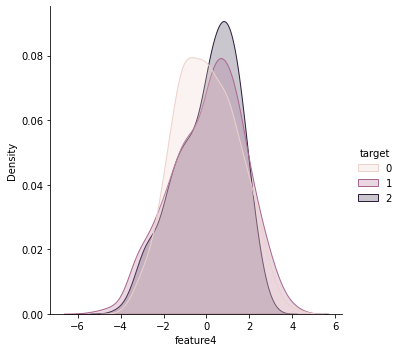

In [9]:
sns.displot(df_Base, x="feature4", hue="target", kind="kde", fill=True)

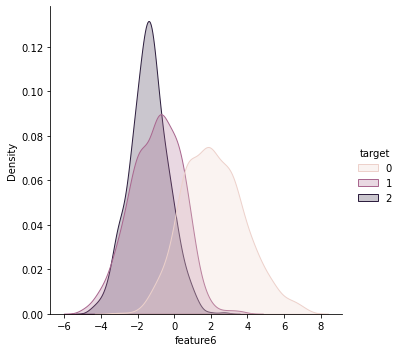

In [10]:
sns.displot(df_Base, x="feature6", hue="target", kind="kde", fill=True)

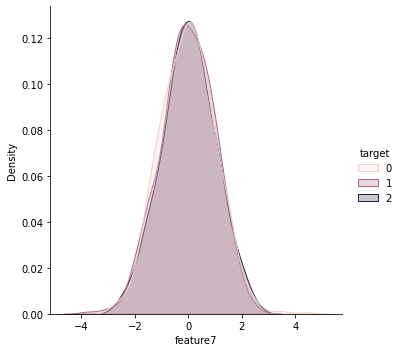

In [11]:
sns.displot(df_Base, x="feature7", hue="target", kind="kde", fill=True)

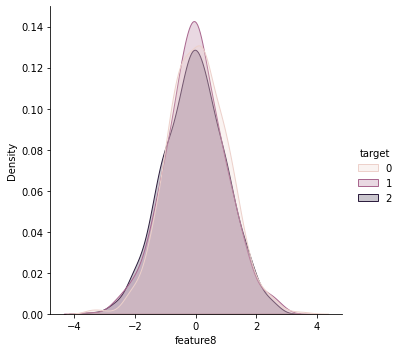

In [12]:
sns.displot(df_Base, x="feature8", hue="target", kind="kde", fill=True)

Contamos registros filas sin valores(Nan Values)

In [13]:
df_Base.isna().sum()

feature1    0
feature2    0
feature3    0
feature4    0
feature5    0
feature6    0
feature7    0
feature8    0
target      0
dtype: int64

Se analiza si existen variables con datos atipicos.

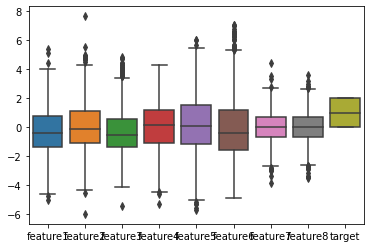

In [14]:
ax = sns.boxplot(data=df_Base)

Se realiza la representacion de mapas de calor para analizar cuales son las variables que tienen algun tipo de relación

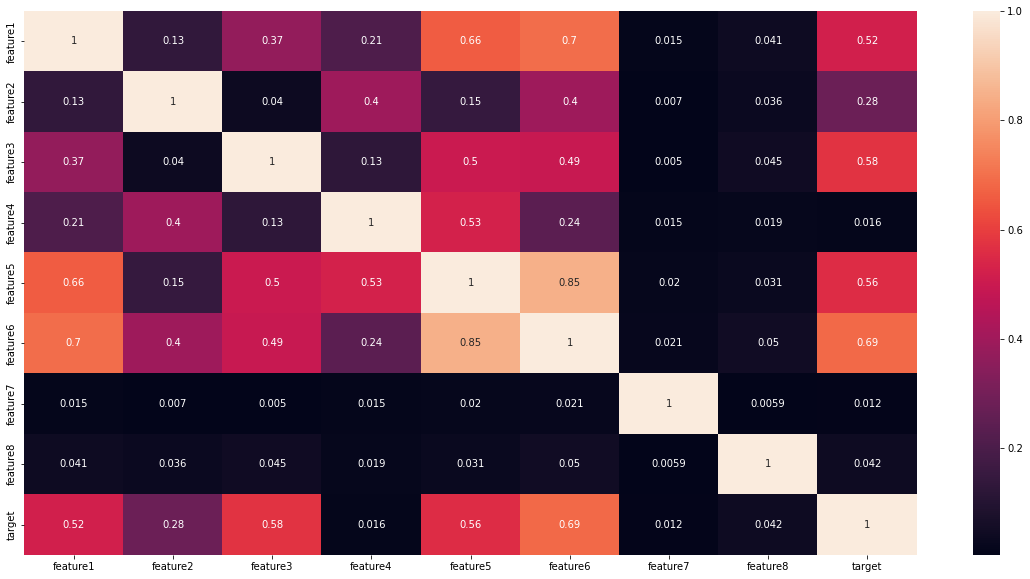

In [30]:
def graficar_correlaciones(df_temp):
    var_num = df_temp._get_numeric_data().columns.values.tolist()
    plt.figure(figsize = (20, 10))
    sns.heatmap(df_temp[var_num].corr().abs(), annot = True)
graficar_correlaciones(df_Base)

A conituacion se muestran aquellas variables que tienen algun tipo de relación

In [23]:
def mostrar_correlaciones(df_temp):
    var_num = df_temp._get_numeric_data().columns.values.tolist()
    df_cols = df_temp[var_num].corr().stack().reset_index()
    df_cols.columns = ['VariableA','VariableB','correlation']
    df_corr = df_cols[(df_cols['correlation']>0.6)&(df_cols['correlation']!=1)]
    display(df_corr)
mostrar_correlaciones(df_Base)

,VariableA,VariableB,correlation
5,feature1,feature6,0.696823
45,feature6,feature1,0.696823


Se grafica las variables que estan correladas entre sí para identificar si existe algún tipo de patron. En esta caso las features 1 y 6 pueden ayudar al modelo a clasificar.

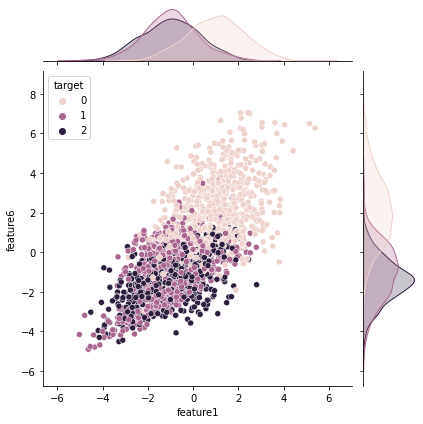

In [32]:
sns.jointplot(data=df_Base, x="feature1", y="feature6", hue="target")

Se realizan graficas de las relaciones entre las variables y la variable a predecir pero como se puede observar no existe ningúna variable correlada con esta.

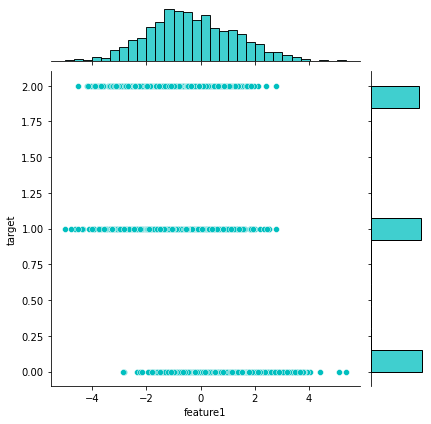

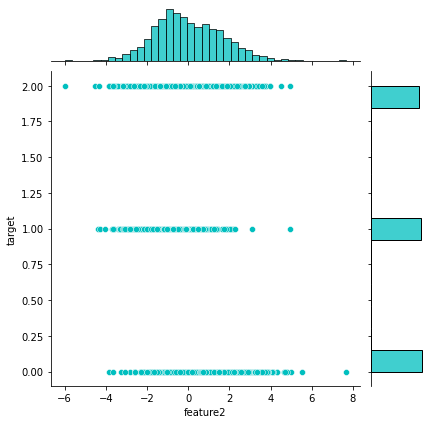

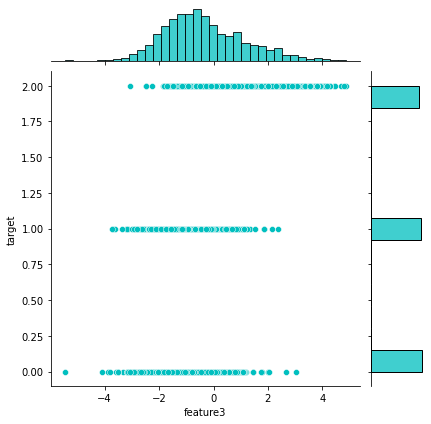

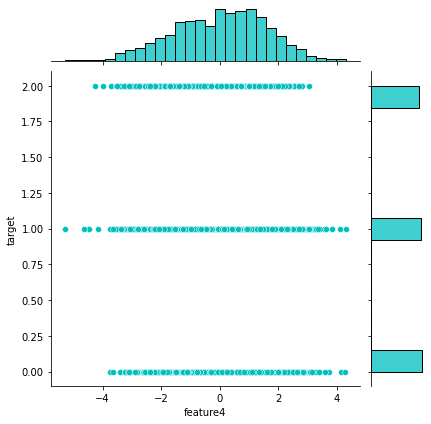

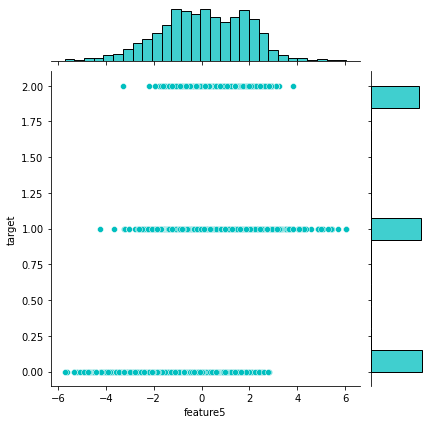

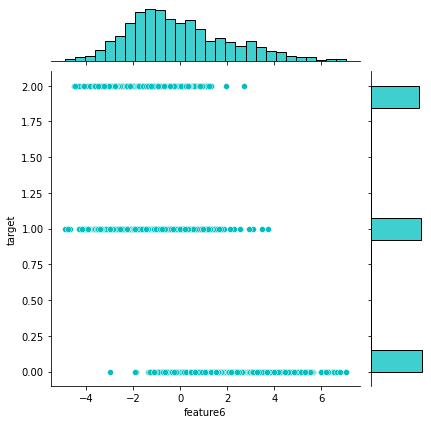

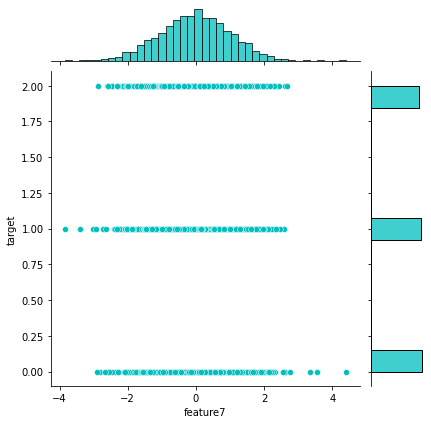

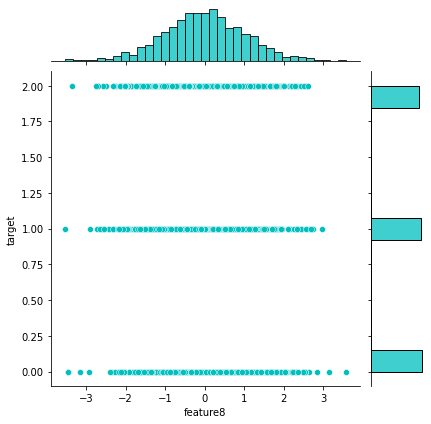

In [24]:
def graficar_carateristicas(df_temp,col_target):
    for feature in df_temp.columns.values:
        if feature != col_target:
            sns.jointplot(x=feature,y=col_target,data=df_temp,color='c')
graficar_carateristicas(df_Base,'target')

Se utiliza Pycaret para realizar la inputacion de variables

**Se debe presionar enter para que se ejecute **

In [19]:
clf1 = setup(data = df_Base, target = 'target',html=False)

,Description,Value
0,session_id,4646
1,Target,target
2,Target Type,Multiclass
3,Label Encoded,None
4,Original Data,"(2100, 9)"
5,Missing Values,False
6,Numeric Features,8
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


### Evaluacion Previa del Modelo
Para esto se realizara una comparativa de los diferentes modelos.

In [21]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.9190,0.9813,0.9190,0.9200,0.9190,0.8785,0.8790,0.513
lightgbm,Light Gradient Boosting Machine,0.9101,0.9800,0.9101,0.9110,0.9102,0.8652,0.8656,0.346
rf,Random Forest Classifier,0.9068,0.9796,0.9067,0.9084,0.9069,0.8601,0.8608,0.578
gbc,Gradient Boosting Classifier,0.8965,0.9753,0.8965,0.8983,0.8967,0.8448,0.8455,1.025
knn,K Neighbors Classifier,0.8925,0.9693,0.8924,0.8948,0.8925,0.8387,0.8397,0.118
qda,Quadratic Discriminant Analysis,0.8571,0.9599,0.8567,0.8610,0.8570,0.7855,0.7875,0.020
dt,Decision Tree Classifier,0.8523,0.8893,0.8522,0.8542,0.8522,0.7784,0.7794,0.022
nb,Naive Bayes,0.8326,0.9445,0.8326,0.8377,0.8329,0.7489,0.7511,0.017
lda,Linear Discriminant Analysis,0.8231,0.9422,0.8222,0.8249,0.8228,0.7345,0.7356,0.019
lr,Logistic Regression,0.8217,0.9444,0.8208,0.8233,0.8210,0.7324,0.7338,0.302


ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=4646, verbose=0,
                     warm_start=False)

### Modelos y Tuning

Debido a que como requisito del ejercicio de pide ejecutar un modelo basado en Random Forest, se procedera a realizar el Tunning de esta variable

In [25]:
best = tune_model(RandomForestClassifier(), n_iter=200, choose_better=True)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9388,0.9858,0.9388,0.9413,0.9390,0.9082,0.9092
1,0.8707,0.9673,0.8702,0.8703,0.8703,0.8061,0.8062
2,0.9048,0.9792,0.9049,0.9096,0.9053,0.8572,0.8590
3,0.9116,0.9809,0.9117,0.9153,0.9118,0.8673,0.8690
4,0.9252,0.9839,0.9250,0.9258,0.9251,0.8877,0.8882
5,0.8912,0.9781,0.8917,0.8949,0.8914,0.8368,0.8384
6,0.9320,0.9830,0.9324,0.9356,0.9325,0.8980,0.8993
7,0.8844,0.9823,0.8839,0.8851,0.8843,0.8264,0.8268
8,0.8912,0.9702,0.8911,0.8911,0.8909,0.8367,0.8370
9,0.9384,0.9932,0.9385,0.9408,0.9388,0.9076,0.9083


In [26]:
print(best)

RandomForestClassifier(bootstrap=False, ccp_alpha=0.0,
                       class_weight='balanced_subsample', criterion='entropy',
                       max_depth=11, max_features='sqrt', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.001,
                       min_impurity_split=None, min_samples_leaf=3,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=None, oob_score=False,
                       random_state=None, verbose=0, warm_start=False)


## Seleccion de variables y entrenamiento

Extraemos la variables que serán utilizadas como features del modelo

In [33]:
columnas_modelo = ['feature1','feature2','feature3','feature4','feature5','feature6','feature7','feature8']
features = df_Base[columnas_modelo]
target = df_Base['target'] 

Se selecciona los conjutos de entrenamiento y test

In [34]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=133)

### Model y Predicciones

In [35]:
class_RFO = RandomForestClassifier(bootstrap=False, ccp_alpha=0.0,
                       class_weight='balanced_subsample', criterion='entropy',
                       max_depth=11, max_features='sqrt', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.001,
                       min_impurity_split=None, min_samples_leaf=3,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=None, oob_score=False,
                       random_state=None, verbose=0, warm_start=False)

In [36]:
class_RFO.fit(X_train,y_train)

RandomForestClassifier(bootstrap=False, ccp_alpha=0.0,
                       class_weight='balanced_subsample', criterion='entropy',
                       max_depth=11, max_features='sqrt', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.001,
                       min_impurity_split=None, min_samples_leaf=3,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=None, oob_score=False,
                       random_state=None, verbose=0, warm_start=False)

Se realizan las predicciones

In [38]:
y_pred = class_RFO.predict(X_test)
print(y_pred)

[2 1 2 2 2 1 1 2 1 0 0 2 0 1 1 1 2 0 1 0 0 0 0 0 0 0 2 1 2 0 0 1 0 1 1 0 2
 1 0 2 0 0 0 2 1 0 2 0 1 0 2 1 1 1 2 2 0 0 2 0 2 2 0 0 1 0 1 0 1 2 2 2 2 0
 0 1 1 2 1 2 2 0 2 1 0 1 1 2 2 1 1 1 2 0 1 0 2 2 1 0 2 0 0 2 2 1 2 1 2 2 2
 2 1 1 0 1 0 1 2 0 2 0 0 1 1 2 1 2 2 2 0 0 0 0 2 2 0 1 1 0 0 0 1 0 1 2 2 2
 0 0 1 2 0 0 2 2 2 2 0 2 1 2 1 0 0 2 2 2 2 0 1 0 2 2 2 1 1 2 0 0 2 0 2 0 0
 0 2 1 1 2 0 1 0 0 1 0 1 2 2 0 0 2 1 1 1 2 1 0 0 1 0 1 0 2 2 1 0 0 0 1 2 1
 2 1 1 0 0 1 0 1 1 2 2 0 2 1 1 0 0 1 0 0 0 0 1 1 2 0 1 1 1 2 2 0 2 2 1 2 0
 0 2 2 1 1 2 0 0 2 0 0 1 2 1 1 1 1 2 0 2 0 1 1 0 1 1 1 2 0 1 0 2 2 1 0 0 0
 0 2 1 2 1 1 2 1 0 1 2 2 1 0 0 0 1 2 2 0 0 2 1 0 2 2 2 0 2 2 0 1 1 0 2 1 1
 1 0 2 2 2 0 0 2 0 0 1 1 2 0 0 2 1 1 2 0 2 2 0 2 1 0 0 1 2 2 0 1 1 2 2 1 1
 2 0 1 0 2 2 1 0 0 1 1 2 1 2 2 1 2 2 2 0 2 2 1 1 0 0 2 0 0 0 2 1 2 0 1 2 2
 1 0 1 2 2 2 0 0 1 1 0 0 1]


### Evaluacion del modelo

In [40]:
def plot_confusion_matrix(cm, target_names, title='Confusion matrix', cmap=None, normalize=True):
    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy
    if cmap is None:
        cmap = plt.get_cmap('Blues')
    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.2f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

In [49]:
def graficar_accuracy_scores(estimator, train_x, train_y,test_x,test_y,nparts=5,jobs=None):
    kfold = KFold(n_splits=nparts,shuffle=True, random_state=123)
    fig,axes = plt.subplots(figsize=(7, 3))
    axes.set_title("Ratio de éxito(Accuracy)/Nro. Fold")
    axes.set_xlabel("Nro. Fold")
    axes.set_ylabel("Accuracy")    
    train_scores = cross_val_score(estimator, train_x,train_y, cv = kfold, n_jobs=jobs, scoring="accuracy")
    test_scores = cross_val_score(estimator, test_x, test_y, cv = kfold, n_jobs=jobs, scoring="accuracy")        
    train_sizes = range(1,nparts+1,1)    
    axes.grid()    
    axes.plot(train_sizes, train_scores, 'o-', color="r",label="Datos Entrenamiento")
    axes.plot(train_sizes, test_scores, 'o-', color="g",label="Validacion Cruzada")
    axes.legend(loc="best")
    return train_scores

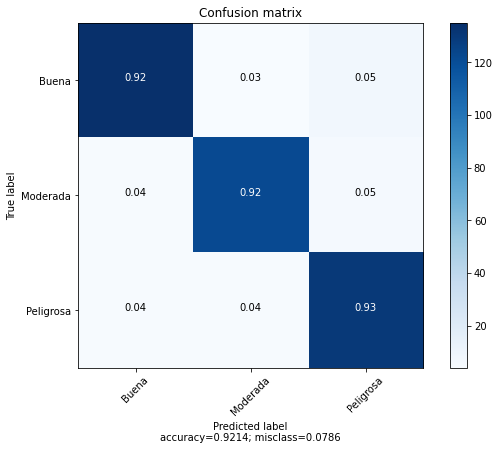

In [53]:
plot_confusion_matrix(confusion_matrix(y_test,y_pred),['Buena','Moderada','Peligrosa'])

In [47]:
clas_report=classification_report(y_test,y_pred)
print(clas_report)

              precision    recall  f1-score   support

           0       0.93      0.92      0.92       147
           1       0.93      0.92      0.92       133
           2       0.90      0.93      0.92       140

    accuracy                           0.92       420
   macro avg       0.92      0.92      0.92       420
weighted avg       0.92      0.92      0.92       420



Se gráfica la evolución de modelo para validar que no exista sobre ajuste.

array([0.88095238, 0.91666667, 0.91369048, 0.92857143, 0.89583333])

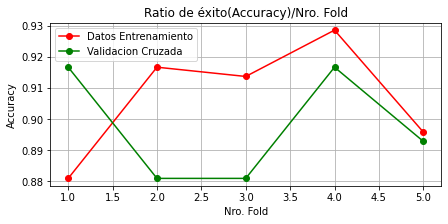

In [50]:
graficar_accuracy_scores(class_RFO,X_train,y_train,X_test,y_test,nparts=5,jobs=2)

### Tunning modelo de ensamble

In [60]:
class_EXT = ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=4646, verbose=0,
                     warm_start=False)
ens_model = VotingClassifier(estimators=[('EXT', class_EXT), ('RFO',class_RFO)])
ens_model.fit(X_train,y_train)


VotingClassifier(estimators=[('EXT',
                              ExtraTreesClassifier(bootstrap=False,
                                                   ccp_alpha=0.0,
                                                   class_weight=None,
                                                   criterion='gini',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                

In [61]:
y_pred = ens_model.predict(X_test)
print(y_pred)

[2 1 2 2 2 1 1 2 1 0 0 2 0 1 1 1 2 0 1 0 0 0 0 0 0 0 2 1 2 0 0 1 0 1 1 0 2
 1 0 2 0 0 0 2 1 0 2 0 1 0 2 1 0 1 2 2 0 0 2 0 2 2 0 0 1 0 1 0 1 1 2 2 2 0
 0 1 1 2 1 2 2 0 2 1 0 0 1 2 2 1 1 1 2 0 1 0 2 2 1 0 2 0 0 2 2 1 2 1 2 2 2
 2 1 1 0 1 0 1 2 0 2 0 0 1 1 1 1 2 2 2 0 0 0 0 2 2 0 1 1 0 0 0 1 0 1 2 2 2
 0 0 0 2 0 0 2 1 2 2 0 2 1 2 1 0 0 2 2 2 2 0 1 0 2 2 2 1 1 2 0 0 2 0 2 0 0
 0 2 1 1 2 0 1 0 0 1 0 1 2 2 0 0 2 1 1 1 2 1 0 0 1 0 1 0 2 2 1 0 0 0 1 2 1
 2 1 1 0 0 1 0 1 1 2 2 0 2 1 1 0 0 1 0 0 0 0 1 1 2 0 1 1 1 2 2 0 2 2 1 2 0
 0 2 2 1 0 2 0 0 2 0 0 1 2 1 1 1 1 2 0 2 0 1 1 0 1 1 1 2 0 1 0 2 2 1 0 0 0
 0 2 1 2 1 1 2 1 0 1 2 1 1 0 0 0 1 2 2 0 0 2 1 0 2 2 2 0 2 2 0 1 1 0 2 1 1
 1 0 2 2 2 0 0 2 0 0 1 1 2 0 0 2 1 1 2 0 2 2 0 2 1 0 0 0 2 2 0 1 1 2 2 1 1
 2 0 1 0 2 2 1 0 0 1 1 2 1 2 0 1 2 2 2 0 2 2 1 1 0 0 2 0 0 0 2 1 2 0 1 2 2
 1 0 1 2 2 2 0 0 1 1 0 0 1]


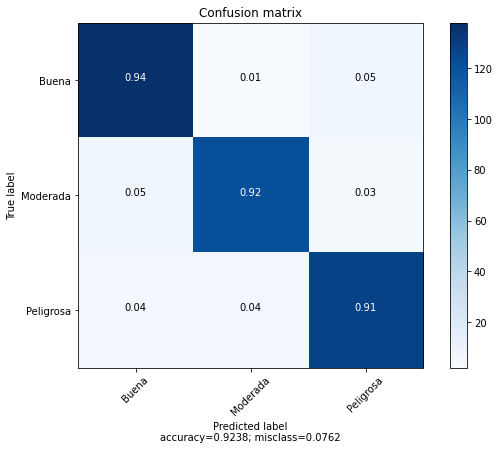

In [67]:
plot_confusion_matrix(confusion_matrix(y_test,y_pred),['Buena','Moderada','Peligrosa'])

### Evaluacion del modelo ensamble

In [63]:
clas_report=classification_report(y_test,y_pred)
print(clas_report)

              precision    recall  f1-score   support

           0       0.91      0.94      0.93       147
           1       0.94      0.92      0.93       133
           2       0.92      0.91      0.92       140

    accuracy                           0.92       420
   macro avg       0.92      0.92      0.92       420
weighted avg       0.92      0.92      0.92       420



Se gráfica la evolución de modelo para validar que no exista sobre ajuste.

array([0.89285714, 0.91071429, 0.92261905, 0.93154762, 0.89583333])

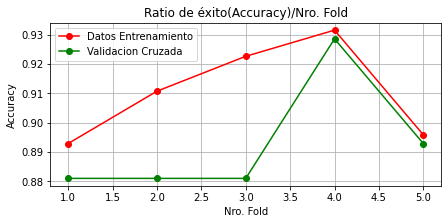

In [64]:
graficar_accuracy_scores(ens_model,X_train,y_train,X_test,y_test,nparts=5,jobs=2)

### Predicciones finales

En este caso a pesar de que el modelo de ensamble mejor el eituqetamiento en una de las variables se oprtara por el modelo Randon Forest debido a que ofrecer una predicción balanacedada entre los diretentes tipos.

In [70]:
features_Test = df_Test[columnas_modelo]
features_Test.head()

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8
0,0.052199,2.514513,-0.197672,1.978709,-2.014691,3.852886,-2.126254,0.794624
1,-0.828073,0.085895,1.712522,0.078828,1.280057,-1.462486,2.469702,0.816540
2,-1.086411,-0.142109,0.013089,-0.115223,0.948242,-1.121574,0.517415,0.250672
3,0.093129,2.868934,-0.075120,0.650641,-0.886186,2.917352,-0.722935,0.063071
4,0.046167,2.822612,0.433869,-3.054525,2.537684,-0.717312,0.862266,-0.525491


In [73]:
y_pred_test = class_RFO.predict(features_Test)
df_restulado = pd.DataFrame(y_pred_test, columns = ['final_status'])

In [74]:
y_pred_test

array([0, 2, 1, 0, 2, 1, 2, 0, 1, 1, 0, 1, 1, 1, 2, 2, 2, 1, 1, 0, 0, 0,
       2, 0, 0, 1, 1, 1, 1, 2, 0, 1, 2, 1, 2, 0, 0, 2, 1, 0, 1, 1, 2, 1,
       1, 0, 0, 0, 1, 2, 2, 0, 1, 0, 0, 2, 0, 2, 2, 0, 1, 0, 2, 0, 1, 0,
       1, 2, 1, 0, 0, 0, 2, 0, 2, 0, 0, 0, 1, 1, 2, 2, 2, 1, 2, 0, 0, 2,
       0, 1, 0, 0, 0, 0, 0, 2, 2, 1, 1, 2, 0, 0, 0, 2, 0, 2, 2, 1, 0, 1,
       2, 0, 1, 2, 2, 1, 2, 2, 1, 0, 0, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       2, 0, 0, 1, 2, 0, 0, 2, 0, 2, 2, 1, 0, 2, 1, 2, 1, 2, 1, 1, 1, 2,
       0, 2, 1, 1, 2, 1, 0, 1, 2, 1, 0, 2, 0, 2, 1, 1, 1, 1, 2, 2, 0, 2,
       2, 0, 0, 2, 1, 1, 0, 1, 0, 1, 0, 2, 1, 1, 0, 0, 1, 2, 2, 0, 2, 2,
       1, 1, 0, 2, 2, 2, 1, 1, 2, 1, 0, 2, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 2, 2, 1, 1, 1, 2, 0, 0, 2, 1, 2, 0, 0, 2, 2, 2, 0, 2,
       2, 0, 1, 0, 0, 0, 1, 2, 1, 2, 1, 2, 1, 0, 0, 1, 1, 2, 1, 2, 0, 0,
       1, 2, 0, 2, 0, 1, 1, 2, 1, 2, 1, 0, 0, 2, 1, 2, 1, 1, 1, 0, 1, 2,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 2, 0, 2, 1,

In [76]:
df_restulado.to_csv("predicciones.csv",index=False)